In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ds3_train.csv')

In [3]:
df.head()

,t,x_1,x_2,y
0,0.0,-1.548319,-2.762987,0
1,0.0,-3.958870,-0.612780,0
2,0.0,-2.276375,0.614934,0
3,0.0,0.556287,-3.931406,0
4,0.0,-1.491000,-2.159297,0


In [4]:
X = df.drop(['t','y'], axis=1)
Y = np.ravel(df.drop(['t','x_1','x_2'], axis=1))
T = np.ravel(df.drop(['y','x_1','x_2'], axis=1))

In [5]:
intercept = np.matrix(np.ones(len(X))).T
intercept.shape

(1250, 1)

In [6]:
X = np.append(intercept,X,1)
X


matrix([[ 1.        , -1.54831899, -2.76298744],
        [ 1.        , -3.95886967, -0.6127805 ],
        [ 1.        , -2.27637464,  0.61493359],
        ...,
        [ 1.        ,  1.10777214,  1.62589313],
        [ 1.        ,  1.46109326,  0.55889854],
        [ 1.        ,  0.93522112,  2.9003691 ]])

In [9]:
lm = LogisticRegression(penalty='none', solver='newton-cg', tol = 1e-5)

In [10]:
lm.fit(X,T)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=1e-05, verbose=0,
                   warm_start=False)

In [12]:
df_test = pd.read_csv('ds3_test.csv')

In [13]:
df_test.head()

,t,x_1,x_2,y
0,0.0,0.387421,-1.866760,0
1,0.0,-2.356436,-1.168553,0
2,0.0,-2.217217,-3.282972,0
3,0.0,-1.373251,-4.551377,0
4,0.0,-1.546461,-3.045420,0


In [14]:
X_test = df_test.drop(['t','y'], axis=1)
Y_test = df_test.drop(['t','x_1','x_2'], axis=1)

In [15]:
X_test.shape
intercept = np.matrix(np.ones(len(X_test))).T
X_test = np.append(intercept,X_test,1)
X_test


matrix([[ 1.        ,  0.38742108, -1.8667595 ],
        [ 1.        , -2.3564358 , -1.16855338],
        [ 1.        , -2.21721732, -3.28297204],
        [ 1.        , -1.37325091, -4.55137674],
        [ 1.        , -1.54646132, -3.04542002],
        [ 1.        , -0.41793849, -3.77467152],
        [ 1.        , -1.42750438, -2.41842099],
        [ 1.        , -5.36092085, -1.00450348],
        [ 1.        , -0.51239235, -4.72431863],
        [ 1.        , -2.77308806, -3.60035128],
        [ 1.        , -1.9876766 , -2.53817461],
        [ 1.        , -2.02461029, -1.51369376],
        [ 1.        , -1.91815921, -0.06751049],
        [ 1.        , -1.5683174 , -2.52601316],
        [ 1.        , -3.08106567, -2.67432881],
        [ 1.        ,  1.20279424, -4.3747048 ],
        [ 1.        , -3.59176468, -0.00738191],
        [ 1.        , -2.07867059, -4.19003337],
        [ 1.        , -1.1373787 , -1.96106878],
        [ 1.        , -3.78157151, -1.97068903],
        [ 1.        

In [16]:
y_preds_T = predict(X_test)

In [ ]:
y_preds_T

In [11]:
lm.coef_

array([[-0.48557083,  2.73208765,  1.0740347 ]])

In [ ]:
Y = np.ravel(Y)

In [17]:
lm.fit(X,Y)
lm.coef_ 

array([[-1.45803726,  0.78596649,  0.09282768]])

In [18]:
def predict(x):
    g = lambda x : 1 / (1+np.exp(-x))
    preds = g(x*theta)
    return preds

In [24]:
theta = lm.coef_
theta = theta.T

In [26]:
y_preds_Y = predict(X_test)
y_preds_Y = np.ravel(y_preds_Y)
y_preds_Y

array([0.20968516, 0.03171948, 0.02915766, 0.04927255, 0.04944414,
       0.10556013, 0.05708126, 0.00312626, 0.09118029, 0.01849106,
       0.03711555, 0.0395504 , 0.048711  , 0.05092344, 0.01586101,
       0.28520756, 0.01363039, 0.02986483, 0.07350738, 0.00982297,
       0.01053476, 0.09938154, 0.05726836, 0.07452403, 0.0051835 ,
       0.00658755, 0.02387916, 0.1659364 , 0.01325925, 0.32666338,
       0.06180665, 0.01262247, 0.00530367, 0.01544319, 0.14279797,
       0.0509877 , 0.13946312, 0.17911559, 0.01820222, 0.01923743,
       0.05091869, 0.02130796, 0.00841203, 0.07638436, 0.04964653,
       0.07789954, 0.01312057, 0.00448627, 0.03528921, 0.52185488,
       0.04477011, 0.08560165, 0.0212241 , 0.08726704, 0.04893792,
       0.00593029, 0.05296467, 0.04010129, 0.07280007, 0.04210349,
       0.02149491, 0.01576456, 0.34711911, 0.55060626, 0.39322436,
       0.33925938, 0.32566669, 0.38844796, 0.3754617 , 0.59558413,
       0.72905313, 0.52706439, 0.517092  , 0.44109466, 0.53758

In [27]:
df_valid = pd.read_csv('ds3_valid.csv')

In [43]:
X_valid = df_valid.drop(['t','y'], axis=1)
Y_valid = np.ravel(df_valid.drop(['t','x_1','x_2'], axis=1))
T_valid = np.ravel(df_valid.drop(['y','x_1','x_2'], axis=1))

In [29]:
intercept = np.matrix(np.ones(len(X_valid))).T
X_valid = np.append(intercept,X_valid,1)


In [30]:
y_preds_val = predict(X_valid)
y_preds_val = np.ravel(y_preds_val)
y_preds_val

array([0.01756493, 0.01028672, 0.00503247, 0.01087053, 0.039617  ,
       0.02127423, 0.13675747, 0.07547288, 0.06127333, 0.20045667,
       0.03505211, 0.05891127, 0.08867727, 0.01233234, 0.0487782 ,
       0.05267265, 0.05216302, 0.03835959, 0.47759758, 0.20792446,
       0.05356524, 0.26839237, 0.35813998, 0.00978507, 0.06795999,
       0.02479989, 0.05227718, 0.37613089, 0.03482063, 0.00836877,
       0.13989069, 0.20458153, 0.06175378, 0.00255045, 0.03712485,
       0.1333369 , 0.09542992, 0.55796656, 0.00577101, 0.0117803 ,
       0.05037099, 0.00980377, 0.00337156, 0.01857936, 0.20718049,
       0.06358856, 0.0196729 , 0.01357447, 0.00796922, 0.02343765,
       0.0302361 , 0.01201107, 0.02167912, 0.01566912, 0.06559294,
       0.01471542, 0.0368892 , 0.10286178, 0.07352648, 0.10174168,
       0.04319814, 0.00526492, 0.57749284, 0.68433292, 0.56240604,
       0.58944535, 0.52372178, 0.56487001, 0.46722495, 0.68061935,
       0.24349346, 0.34948051, 0.37825366, 0.52083088, 0.31662

In [31]:
alpha = y_preds_val[Y_valid == 1].sum() / (Y_valid == 1).sum()

In [32]:
alpha

0.45705542621504375

In [38]:
lm.coef_ = np.ravel(lm.coef_)
lm.coef_ = list(lm.coef_)

In [39]:
correction = 1 + (np.log(2 / alpha - 1) / lm.coef_[0])

In [40]:
correction

0.1655609216394235

In [36]:
lm.predict(X_valid)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
pos = X_valid[T_valid==1]
neg = X_valid[T_valid==0]

In [58]:
neg = neg.values

In [59]:
xc = (np.ravel(pos[:,0]),np.ravel(pos[:,1]))
yc = (np.ravel(neg[:,0]),np.ravel(neg[:,1]))

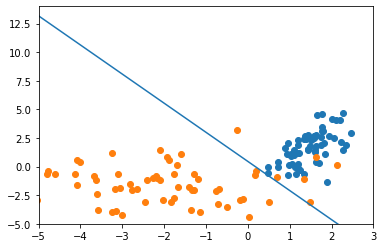

In [87]:
import matplotlib.pyplot as plt
plt.scatter(*xc)
plt.scatter(*yc)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlim(-5,3)
plt.ylim((-5,14))
plt.show()

In [85]:
theta_T = [-0.48557083,  2.73208765,  1.0740347 ]
#theta_T = [-6.20669493,  2.45177926, -0.02939447]

In [86]:
x_values = [np.min(X_valid[:, 0] - 5), np.max(X_valid[:, 1] + 5)]
y_values = - (theta_T[0] + np.dot(theta_T[1], x_values)) / theta_T[2]

In [68]:
X_valid = np.array(X_valid)

In [71]:
theta_Y = [-1.45803726,  0.78596649,  0.09282768]

In [72]:
x_values = [np.min(X_valid[:, 0] - 5), np.max(X_valid[:, 1] + 5)]
y_values = - (theta_Y[0] + np.dot(theta_Y[1], x_values)) / theta_Y[2]

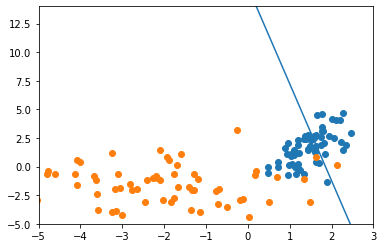

In [73]:
plt.scatter(*xc)
plt.scatter(*yc)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlim(-5,3)
plt.ylim((-5,14))
plt.show()

In [91]:
theta_corrected = theta_Y +alpha

In [92]:
x_values = [np.min(X_valid[:, 0] - 5), np.max(X_valid[:, 1] + 5)]
y_values = - (theta_corrected[0] + np.dot(theta_corrected[1], x_values)) / theta_corrected[2]

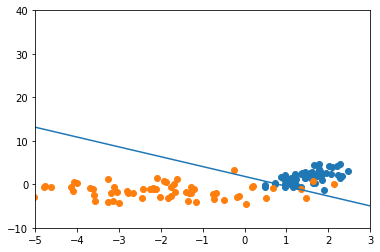

In [93]:
plt.scatter(*xc)
plt.scatter(*yc)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlim(-5,3)
plt.ylim((-10,40))
plt.show()